<a href="https://colab.research.google.com/github/ludimilalustosa-afk/blank-app/blob/main/SimulacaoDeMonteCarlo_AEDI_Tarefa1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Distribuição de Poisson de X > 2: 0.19115
Simulação de Monte Carlo de X > 2: 0.19101


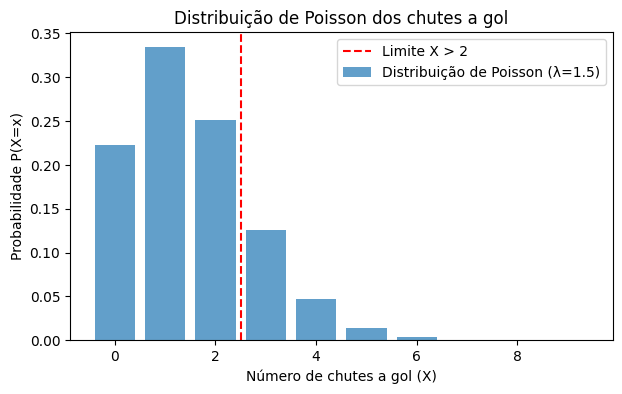

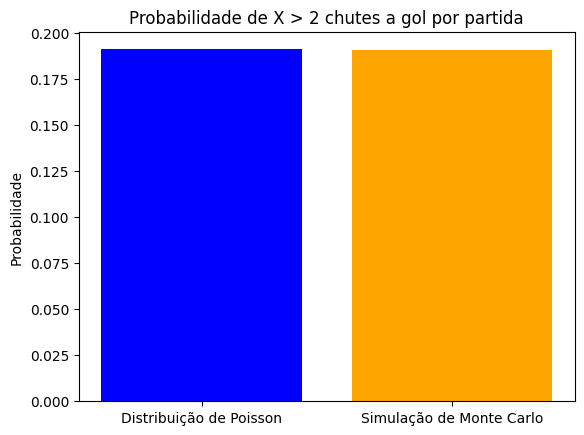

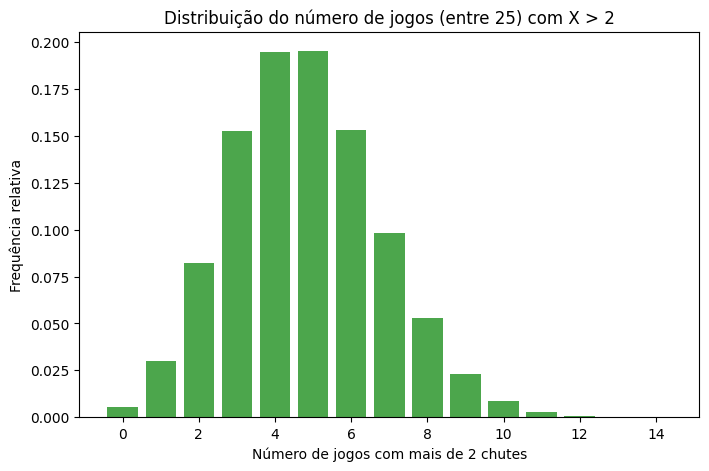

In [ ]:
"""
Projeto: Tarefa 1 – AEDI – Distribuição de Poisson e Simulação de Monte Carlo
Estimativa da probabilidade de X > 2 chutes a gol por partida
Autora: Ludimila
"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import poisson
"""
Parâmetros
md_chutes	      = média de chutes por partida na temporada passada
num_jogos	      = número de jogos no campeonato
num_simulacoes	= número de simulações de Monte Carlo
"""

md_chutes	      = 1.5
num_jogos	      = 25
num_simulacoes  = 100000

""" ---------------------------
    Distribuição de Poisson (fórmula)
    ---------------------------
    P(X > 2) = 1 - P(X <= 2)
"""
p_teorica = 1 - poisson.cdf(2, mu=md_chutes)
print(f"Distribuição de Poisson de X > 2: {p_teorica:.5f}")

""" ---------------------------
    Simulação de Monte Carlo
    ---------------------------
    Gerar matriz (num_simulacoes x num_jogos), cada célula = número de chutes por partida
"""

simulacoes = np.random.poisson(lam=md_chutes, size=(num_simulacoes, num_jogos))
p_empirica = np.mean(simulacoes > 2)
print(f"Simulação de Monte Carlo de X > 2: {p_empirica:.5f}")

""" ---------------------------
    Estatísticas por campeonato
    ---------------------------
    Quantos jogos com X > 2 em cada campeonato (25 jogos)
"""

jogos_acima2 = np.sum(simulacoes > 2, axis=1)

""" ---------------------------
   Distribuição da quantidade de jogos com mais de 2 chutes
   ---------------------------
"""
df_resultados = pd.Series(jogos_acima2).value_counts(normalize=True).sort_index()

""" ---------------------------
    Distribuição de Poisson
    ---------------------------
"""
x_vals = np.arange(0, 10)
pmf_vals = poisson.pmf(x_vals, mu=md_chutes)

plt.figure(figsize=(7,4))
plt.bar(x_vals, pmf_vals, alpha=0.7, label="Distribuição de Poisson (λ=1.5)")
plt.axvline(2.5, color="red", linestyle="--", label="Limite X > 2")
plt.title("Distribuição de Poisson dos chutes a gol")
plt.xlabel("Número de chutes a gol (X)")
plt.ylabel("Probabilidade P(X=x)")
plt.legend()
plt.show()
""" ---------------------------
    Comparação Distribuição de Poisson X Simulação de MOnte Carlo
    ---------------------------
"""

plt.bar(["Distribuição de Poisson", "Simulação de Monte Carlo"], [p_teorica, p_empirica], color=["blue", "orange"])
plt.title("Probabilidade de X > 2 chutes a gol por partida")
plt.ylabel("Probabilidade")
plt.show()

""" ---------------------------
    Distribuição do número de partidas (ente 25 jogos) com mais 2 chutes a gol
    ---------------------------
"""

plt.figure(figsize=(8,5))
plt.bar(df_resultados.index, df_resultados.values, color="green", alpha=0.7)
plt.title("Distribuição do número de jogos (entre 25) com X > 2")
plt.xlabel("Número de jogos com mais de 2 chutes")
plt.ylabel("Frequência relativa")
plt.show()

